In [7]:
import time
import pandas as pd

# Import all implementations
from kd_tree import interactive_query_system as kd_tree_query
from quad_tree import interactive_query_system_quad as quad_tree_query
from range_tree import interactive_query_system_range as range_tree_query
from r_tree import interactive_query_system_rtree as r_tree_query

# Define a function to benchmark a method
def benchmark(method_name, method_function, file_path, query_params):
    print(f"\nBenchmarking: {method_name}")
    
    start_time = time.time()
    try:
        results = method_function(file_path, **query_params)  # Run the method
    except Exception as e:
        results = None
        print(f"Error in {method_name}: {e}")
    end_time = time.time()
    
    execution_time = end_time - start_time
    results_count = len(results) if results is not None else 0

    print(f"{method_name} - Execution Time: {execution_time:.4f} seconds")
    print(f"{method_name} - Results Count: {results_count}")
    return {"method": method_name, "execution_time": execution_time, "results_count": results_count}

# Set file path and query parameters
file_path = "simplified_coffee.csv"
query_params = {
    "start_year": 2019,
    "end_year": 2021,
    "min_rating": 94,
    "min_price": 4,
    "max_price": 10,
    "country": "United States", 
    "n_results": 3,
    "query_text": "rich"
}

# Benchmark each method
results = []

results.append(benchmark("KD-Tree + LSH", kd_tree_query, file_path, query_params))
results.append(benchmark("Quad Tree + LSH", quad_tree_query, file_path, query_params))
results.append(benchmark("Range Tree + LSH", range_tree_query, file_path, query_params))
results.append(benchmark("R-Tree + LSH", r_tree_query, file_path, query_params))


# Compare results in a DataFrame
comparison_df = pd.DataFrame(results)


# Print final comparison
print("\nComparison Results:")
print(comparison_df)



Benchmarking: KD-Tree + LSH
No results found within the radius. Using k-nearest neighbors.
KD-Tree + LSH - Execution Time: 0.0940 seconds
KD-Tree + LSH - Results Count: 0

Benchmarking: Quad Tree + LSH
Quad Tree + LSH - Execution Time: 0.1160 seconds
Quad Tree + LSH - Results Count: 3

Benchmarking: Range Tree + LSH
Range Tree + LSH - Execution Time: 0.1380 seconds
Range Tree + LSH - Results Count: 3

Benchmarking: R-Tree + LSH
R-Tree + LSH - Execution Time: 0.0960 seconds
R-Tree + LSH - Results Count: 3

Comparison Results:
             method  execution_time  results_count
0     KD-Tree + LSH        0.094011              0
1   Quad Tree + LSH        0.115996              3
2  Range Tree + LSH        0.137972              3
3      R-Tree + LSH        0.096021              3


c:\Users\MINE\Downloads\multidimensional\Multi-Dimensional-Data-Structures\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\MINE\Downloads\multidimensional\Multi-Dimensional-Data-Structures\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\MINE\Downloads\multidimensional\Multi-Dimensional-Data-Structures\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\MINE\Downloads\multidimensional\Multi-Dimensional-Data-Structures\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


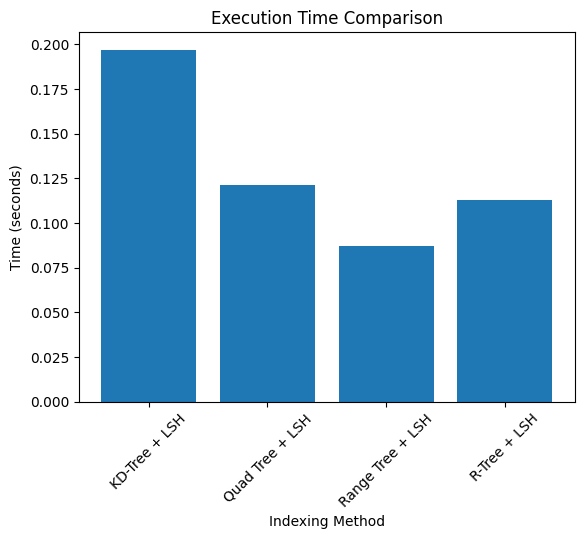

In [3]:
import matplotlib.pyplot as plt

# Plot execution time comparison
plt.bar(comparison_df['method'], comparison_df['execution_time'])
plt.title('Execution Time Comparison')
plt.ylabel('Time (seconds)')
plt.xlabel('Indexing Method')
plt.xticks(rotation=45)
plt.show()
